**Necessary Install**

In [132]:
%pip install vin

**Imports**

In [133]:
import pandas as pd
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
from vin import VIN
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

**Read Vehicle Date**

In [179]:
data = pd.read_csv('data/vehicles.csv')
data.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


**Details of vehicle data**

In [135]:
print("Data before removing duplicate: ", data.shape)

Data before removing duplicate:  (426880, 18)


In [136]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

**Missing Data**

In [180]:
missing_percent = data.isnull().sum() / len(data) * 100
print(missing_percent)

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


**Observe Categorical columns**

In [138]:
def get_unique_values(df):
  for col in df.columns:
      values = data[col].unique()
      print(f"Distinct values for {col}: {values} \n")

get_unique_values(data)

Distinct values for id: [7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129] 

Distinct values for region: ['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 

**Remove duplicates**

In [139]:
#remove duplicates
data = data.drop_duplicates()
print("After removing duplicates:", data.shape)

After removing duplicates: (426880, 18)


**Drop columns that are not needed by the model**

In [140]:
data = data.drop(['id','size'], axis =1)

**Fix Data Type of columns**

In [141]:
data['VIN'] = data['VIN'].astype('string')
data['manufacturer'] = data['manufacturer'].astype('string')
data['model'] = data['model'].astype('string')
data['condition'] = data['condition'].astype('string')
data['cylinders'] = data['cylinders'].astype('string')
data['fuel'] = data['fuel'].astype('string')
data['title_status'] = data['title_status'].astype('string')
data['transmission'] = data['transmission'].astype('string')
data['drive'] = data['drive'].astype('string')
data['type'] = data['type'].astype('string')
data['paint_color'] = data['paint_color'].astype('string')
data['state'] = data['state'].astype('string')

**Apply Data Transformations**

**Impute model, manufacturer, type, year using VIN based transformations**

In [142]:
# Apply VIN based imputation for year, make, model and vehicle type columns
def fill_vehicle_year(row):
    try:
        vin = VIN(row.VIN)
        return vin.model_year
    except BaseException:
        return row.year

def fill_vehicle_manufacturer(row):
    try:
        vin = VIN(row.VIN)
        return vin.make.lower()
    except BaseException:
        return row.manufacturer

def fill_vehicle_model(row):
    try:
        vin = VIN(row.VIN)
        return vin.model.lower()
    except BaseException:
        return row.model

def fill_vehicle_type(row):
    try:
        vin = VIN(row.VIN)
        return vin.body_class.lower()
    except BaseException:
        return row.type

def vin_based_imputation(col):
    if col == 'year':
        vehicles_year = data.loc[data[col].isna() & data['VIN'].notna()]
        data.loc[vehicles_year.index, col] = vehicles_year.apply(fill_vehicle_year, axis=1)
    elif col == 'manufacturer':
        vehicles_make = data.loc[data[col].isna() & data['VIN'].notna()]
        data.loc[vehicles_make.index, col] = vehicles_make.apply(fill_vehicle_manufacturer, axis=1)
    elif col == 'model':
        vehicles_model = data.loc[data[col].isna() & data['VIN'].notna()]
        data.loc[vehicles_model.index, col] = vehicles_model.apply(fill_vehicle_model, axis=1)
    elif col == 'type':
        vehicles_type = data.loc[data[col].isna() & data['VIN'].notna()]
        data.loc[vehicles_type.index, col] = vehicles_type.apply(fill_vehicle_type, axis=1)
    return data



In [143]:
missing_percent = data.isnull().sum() / len(data) * 100
print(missing_percent)

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


In [144]:
data = vin_based_imputation('year')
data = vin_based_imputation('manufacturer')
data = vin_based_imputation('model')
types = data['type'].unique()
data = vin_based_imputation('type')

In [145]:
missing_percent = data.isnull().sum() / len(data) * 100
print(missing_percent)

region           0.000000
price            0.000000
year             0.044978
manufacturer     2.837566
model            0.871674
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
type            15.975216
paint_color     30.501078
state            0.000000
dtype: float64


In [146]:
data.shape[0]

426880

**Drop rows with NaN values**

In [147]:
def drop_rows_with_nan_in_columns(df, columns, inplace=False):
    """
    Drop rows that have NaN values in specified columns

    Parameters:
    df (DataFrame): Input DataFrame
    columns (list): List of column names to check for NaN
    inplace (bool): If True, modify original DataFrame

    Returns:
    DataFrame: DataFrame with specified NaN rows removed
    """
    if inplace:
        df.dropna(subset=columns, inplace=True)
        return df
    else:
        return df.dropna(subset=columns)

# Usage
data = drop_rows_with_nan_in_columns(data, ['year','odometer','model','manufacturer'])

In [148]:
missing_percent = data.isnull().sum() / len(data) * 100
print(missing_percent)

region           0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
condition       40.686262
cylinders       41.137415
fuel             0.532733
odometer         0.000000
title_status     1.835079
transmission     0.408150
VIN             35.862177
drive           29.731815
type            14.721175
paint_color     29.754422
state            0.000000
dtype: float64


In [149]:
data.shape[0]

406958

**Remove outliers for price**

In [150]:
#Remove

def detect_price_outliers_iqr(df, price_column='price', multiplier=1.5):
    """
    Detect price outliers using IQR method

    Parameters:
    df: DataFrame
    price_column: Name of price column
    multiplier: IQR multiplier (1.5 = standard, 3.0 = extreme outliers)

    Returns:
    DataFrame with outlier information
    """
    # Calculate IQR
    Q1 = df[price_column].quantile(0.25)
    Q3 = df[price_column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Identify outliers
    outliers_mask = (df[price_column] < lower_bound) | (df[price_column] > upper_bound)

    print(f"Price IQR Analysis:")
    print(f"Q1 (25th percentile): ${Q1:,.2f}")
    print(f"Q3 (75th percentile): ${Q3:,.2f}")
    print(f"IQR: ${IQR:,.2f}")
    print(f"Lower bound: ${lower_bound:,.2f}")
    print(f"Upper bound: ${upper_bound:,.2f}")
    print(f"Outliers detected: {outliers_mask.sum():,} ({outliers_mask.sum()/len(df)*100:.2f}%)")

    return outliers_mask, lower_bound, upper_bound

# Usage
outliers_mask, lower_bound, upper_bound = detect_price_outliers_iqr(data)

# Remove outliers
data = data[~outliers_mask]
print(f"Rows after removing outliers: {len(data):,}")

Price IQR Analysis:
Q1 (25th percentile): $5,995.00
Q3 (75th percentile): $26,698.75
IQR: $20,703.75
Lower bound: $-25,060.62
Upper bound: $57,754.38
Outliers detected: 7,443 (1.83%)
Rows after removing outliers: 399,515


In [151]:
def clean_data(df):
    """
    Most concise version
    """
    # Count and drop problematic rows
    drop_mask = (df['price'] == 0) & (df['title_status'].isna() | df['condition'].isna())
    rows_dropped = drop_mask.sum()

    df_clean = df[~drop_mask]
    print(f"Number of rows dropped: {rows_dropped:,}")

    # Impute remaining zeros
    zero_count = (df_clean['price'] == 0).sum()
    if zero_count > 0:
        median_price = df_clean[df_clean['price'] > 0]['price'].median()
        df_clean.loc[df_clean['price'] == 0, 'price'] = median_price
        print(f"Imputed {zero_count:,} zero prices with median: ${median_price:,.2f}")

    return df_clean

# Usage
data = clean_data(data)
data.shape[0]

Number of rows dropped: 20,078
Imputed 9,324 zero prices with median: $14,999.00


379437

In [152]:
for col in ['year','odometer']:
    upper_limit = data[col].quantile(0.99)
    # Fix: Use the column name directly, not data[col] in .loc
    data.loc[:, col] = np.where(data[col] > upper_limit, upper_limit, data[col])

In [153]:
data['year'] = data['year'].astype('int64')

In [154]:
data.shape[0]

379437

**Trnasform cylinder column**

In [155]:
#Make cylinder an intger
data.loc[data['cylinders'] == '8 cylinders', 'cylinders'] = '8'
data.loc[data['cylinders'] == '4 cylinders', 'cylinders'] = '4'
data.loc[data['cylinders'] == '10 cylinders', 'cylinders'] = '10'
data.loc[data['cylinders'] == '12 cylinders', 'cylinders'] = '12'
data.loc[data['cylinders'] == '3 cylinders', 'cylinders'] = '3'
data.loc[data['cylinders'] == '5 cylinders', 'cylinders'] = '5'
data.loc[data['cylinders'] == '6 cylinders', 'cylinders'] = '6'
data.loc[data['fuel'] == 'electric', 'cylinders'] = '0'
data.loc[data['cylinders'] == 'other', 'cylinders'] = np.nan
data['cylinders'] = data['cylinders'].astype('float64')

**Transform Type column**

In [156]:
data.loc[data['type'] == 'sport utility vehicle (suv)/multi-purpose vehicle (mpv)', 'type'] = 'SUV'
data.loc[data['type'] == 'sedan/saloon', 'type'] = 'sedan'
data.loc[data['type'] == 'hatchback/liftback/notchback', 'type'] = 'hatchback'
data.loc[data['type'] == 'sport utility truck (sut)', 'type'] = 'truck'
data.loc[data['type'] == 'cargo van', 'type'] = 'van'
data.loc[data['type'] == 'mini-van', 'type'] = 'minivan'
data.loc[data['type'] == 'crossover utility vehicle (cuv)', 'type'] = 'CUV'
data.loc[data['type'] == 'convertible/cabriolet', 'type'] = 'convertible'
data.loc[data['type'] == 'truck-tractor', 'type'] = 'truck'

**Transform possible model columns for cleaner labeled data**

In [157]:
mask = (data['manufacturer'] == 'chevrolet') & (data['model'].str.contains('silverado', case=False, na=False))
data.loc[mask, 'model'] = 'silverado 1500'

mask = (data['manufacturer'] == 'chevrolet') & (data['model'].str.contains('silverado 2500', case=False, na=False))
data.loc[mask, 'model'] = 'silverado 1500'

mask = (data['manufacturer'] == 'chevrolet') & (data['model'].str.contains('1500', case=False, na=False))
data.loc[mask, 'model'] = 'silverado 1500'

mask = (data['manufacturer'] == 'chevrolet') & (data['model'].str.contains('traverse', case=False, na=False))
data.loc[mask, 'model'] = 'traverse'

mask = (data['manufacturer'] == 'chevrolet') & (data['model'].str.contains('tahoe', case=False, na=False))
data.loc[mask, 'model'] = 'tahoe SUV'

mask = (data['manufacturer'] == 'chevrolet') & (data['model'].str.contains('suburban', case=False, na=False))
data.loc[mask, 'model'] = 'suburban 1500'

mask = (data['manufacturer'] == 'gmc') & (data['model'].str.contains('savanna', case=False, na=False))
data.loc[mask, 'model'] = 'savanna 3500'

mask = (data['manufacturer'] == 'gmc') & (data['model'].str.contains('terrain', case=False, na=False))
data.loc[mask, 'model'] = 'terrain SUV'

mask = (data['manufacturer'] == 'gmc') & (data['model'].str.contains('sierra', case=False, na=False))
data.loc[mask, 'model'] = 'sierra 1500'

mask = (data['manufacturer'] == 'gmc') & (data['model'].str.contains('1500', case=False, na=False))
data.loc[mask, 'model'] = 'sierra 1500'

mask = (data['manufacturer'] == 'gmc') & (data['model'].str.contains('yukon', case=False, na=False))
data.loc[mask, 'model'] = 'yukon xl'

mask = (data['manufacturer'] == 'ram') & (data['model'].str.contains('laramie', case=False, na=False))
data.loc[mask, 'model'] = 'laramie 1500'

mask = (data['manufacturer'] == 'ram') & (data['model'].str.contains('1500', case=False, na=False))
data.loc[mask, 'model'] = 'laramie 1500'

mask = (data['manufacturer'] == 'ford') & (data['model'].str.contains('f150', case=False, na=False))
data.loc[mask, 'model'] = 'f150'

mask = (data['manufacturer'] == 'ford') & (data['model'].str.contains('f-150', case=False, na=False))
data.loc[mask, 'model'] = 'f150'

mask = (data['manufacturer'] == 'ford') & (data['model'].str.contains('taurus', case=False, na=False))
data.loc[mask, 'model'] = 'taurus sedan'

mask = (data['manufacturer'] == 'ford') & (data['model'].str.contains('transit', case=False, na=False))
data.loc[mask, 'model'] = 'transit'

mask = (data['manufacturer'] == 'bmw') & (data['model'].str.contains('z4', case=False, na=False))
data.loc[mask, 'model'] = 'z4 coupe'

mask = (data['manufacturer'] == 'bmw') & (data['model'].str.contains('x5', case=False, na=False))
data.loc[mask, 'model'] = 'x5 SUV'

mask = (data['manufacturer'] == 'bmw') & (data['model'].str.contains('x3', case=False, na=False))
data.loc[mask, 'model'] = 'x3 SUV'

mask = (data['manufacturer'] == 'volvo') & (data['model'].str.contains('xc60', case=False, na=False))
data.loc[mask, 'model'] = 'xc60 SUV'

mask = (data['manufacturer'] == 'jeep') & (data['model'].str.contains('wrangler', case=False, na=False))
data.loc[mask, 'model'] = 'wrangler SUV'

mask = (data['manufacturer'] == 'toyota') & (data['model'].str.contains('tundra', case=False, na=False))
data.loc[mask, 'model'] = 'tundra truck'

mask = (data['manufacturer'] == 'toyota') & (data['model'].str.contains('tacoma', case=False, na=False))
data.loc[mask, 'model'] = 'tacoma truck'

mask = (data['manufacturer'] == 'hyundai') & (data['model'].str.contains('tucson', case=False, na=False))
data.loc[mask, 'model'] = 'tucson'

mask = (data['manufacturer'] == 'chrysler') & (data['model'].str.contains('town', case=False, na=False))
data.loc[mask, 'model'] = 'town & country'

mask = (data['manufacturer'] == 'nissan') & (data['model'].str.contains('titan', case=False, na=False))
data.loc[mask, 'model'] = 'titan'

mask = (data['manufacturer'] == 'volkswagen') & (data['model'].str.contains('tiguan', case=False, na=False))
data.loc[mask, 'model'] = 'tiguan'

mask = (data['manufacturer'] == 'dodge') & (data['model'].str.contains('1500', case=False, na=False))
data.loc[mask, 'model'] = 'ram 1500'

mask = (data['manufacturer'] == 'honda') & (data['model'].str.contains('accord', case=False, na=False))
data.loc[mask, 'model'] = 'accord sedan'

mask = (data['manufacturer'] == 'honda') & (data['model'].str.contains('civic', case=False, na=False))
data.loc[mask, 'model'] = 'civic sedan'

mask = (data['manufacturer'] == 'honda') & ((data['model'].str.contains('crv', case=False, na=False) | data['model'].str.contains('cr-v', case=False, na=False)))
data.loc[mask, 'model'] = 'civic sedan'

mask = (data['manufacturer'] == 'honda') & ((data['model'].str.contains('ody', case=False, na=False) | data['model'].str.contains('odd', case=False, na=False)))
data.loc[mask, 'model'] = 'odyssey van'

mask = (data['manufacturer'] == 'toyota') & (data['model'].str.contains('camry', case=False, na=False))
data.loc[mask, 'model'] = 'camry sedan'

mask = (data['manufacturer'] == 'toyota') & (data['model'].str.contains('corolla', case=False, na=False))
data.loc[mask, 'model'] = 'corolla sedan'

mask = (data['manufacturer'] == 'toyota') & (data['model'].str.contains('prius', case=False, na=False))
data.loc[mask, 'model'] = 'prius sedan'

mask = (data['manufacturer'] == 'toyota') & (data['model'].str.contains('highlander', case=False, na=False))
data.loc[mask, 'model'] = 'highlander SUV'

mask = (data['manufacturer'] == 'toyota') & (data['model'].str.contains('rav', case=False, na=False))
data.loc[mask, 'model'] = 'rav4 SUV'

**Fill NaN with 'Unknown' for type, paint_color, VIN, drive**

In [158]:
data['type'].fillna('Unknown', inplace=True)
data['paint_color'].fillna('Unknown', inplace=True)
data['VIN'].fillna('Unknown', inplace=True)
data['drive'].fillna('Unknown', inplace=True)


/tmp/ipython-input-4277326106.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['type'].fillna('Unknown', inplace=True)
/tmp/ipython-input-4277326106.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [159]:
missing_percent = data.isnull().sum() / len(data) * 100
print(missing_percent)

region           0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
condition       37.027227
cylinders       40.061723
fuel             0.547390
odometer         0.000000
title_status     1.875674
transmission     0.378719
VIN              0.000000
drive            0.000000
type             0.000000
paint_color      0.000000
state            0.000000
dtype: float64


**Ordinal Encoding for condition, title_status, drive from worst to best**

In [160]:
def sklearn_ordinal_encode_condition(df, condition_col,categories):
    """
    Use sklearn's OrdinalEncoder with custom category order
    """

    # Initialize the encoder
    encoder = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)

    # Fit and transform the data
    condition_values = df[condition_col].values.reshape(-1, 1)
    encoded_values = encoder.fit_transform(condition_values)

    # Add encoded column
    df[condition_col+'_encoded'] = encoded_values.flatten()

    print("Sklearn Ordinal Encoding:")
    print(f"Categories order: {encoder.categories_[0]}")
    print(f"Encoded values: {df[condition_col+'_encoded'].value_counts().sort_index()}")

    return df

# Usage
# Define the order from worst to best
categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]
data = sklearn_ordinal_encode_condition(data,'condition',categories)

categories = [['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean']]
data = sklearn_ordinal_encode_condition(data,'title_status',categories)

categories = [['fwd','rwd','4wd']]
data = sklearn_ordinal_encode_condition(data,'drive',categories)

Sklearn Ordinal Encoding:
Categories order: ['salvage' 'fair' 'good' 'excellent' 'like new' 'new']
Encoded values: condition_encoded
-1.0    140495
 0.0       534
 1.0      5956
 2.0    116840
 3.0     95031
 4.0     19568
 5.0      1013
Name: count, dtype: int64
Sklearn Ordinal Encoding:
Categories order: ['parts only' 'missing' 'salvage' 'rebuilt' 'lien' 'clean']
Encoded values: title_status_encoded
-1.0      7117
 0.0       137
 1.0       555
 2.0      3609
 3.0      6949
 4.0      1272
 5.0    359798
Name: count, dtype: int64
Sklearn Ordinal Encoding:
Categories order: ['fwd' 'rwd' '4wd']
Encoded values: drive_encoded
-1.0    113588
 0.0     97684
 1.0     51476
 2.0    116689
Name: count, dtype: int64


**Label encoding for model, manufacturer, state**

In [161]:
# Create label encoders
model_encoder = LabelEncoder()
manufacturer_encoder = LabelEncoder()

# Fit and transform the columns
data['model_encoded'] = model_encoder.fit_transform(data['model'])
data['manufacturer_encoded'] = manufacturer_encoder.fit_transform(data['manufacturer'])
data['state_encoded'] = model_encoder.fit_transform(data['state'])

**Visualize top 10 selling manufacturer, model and years of car**

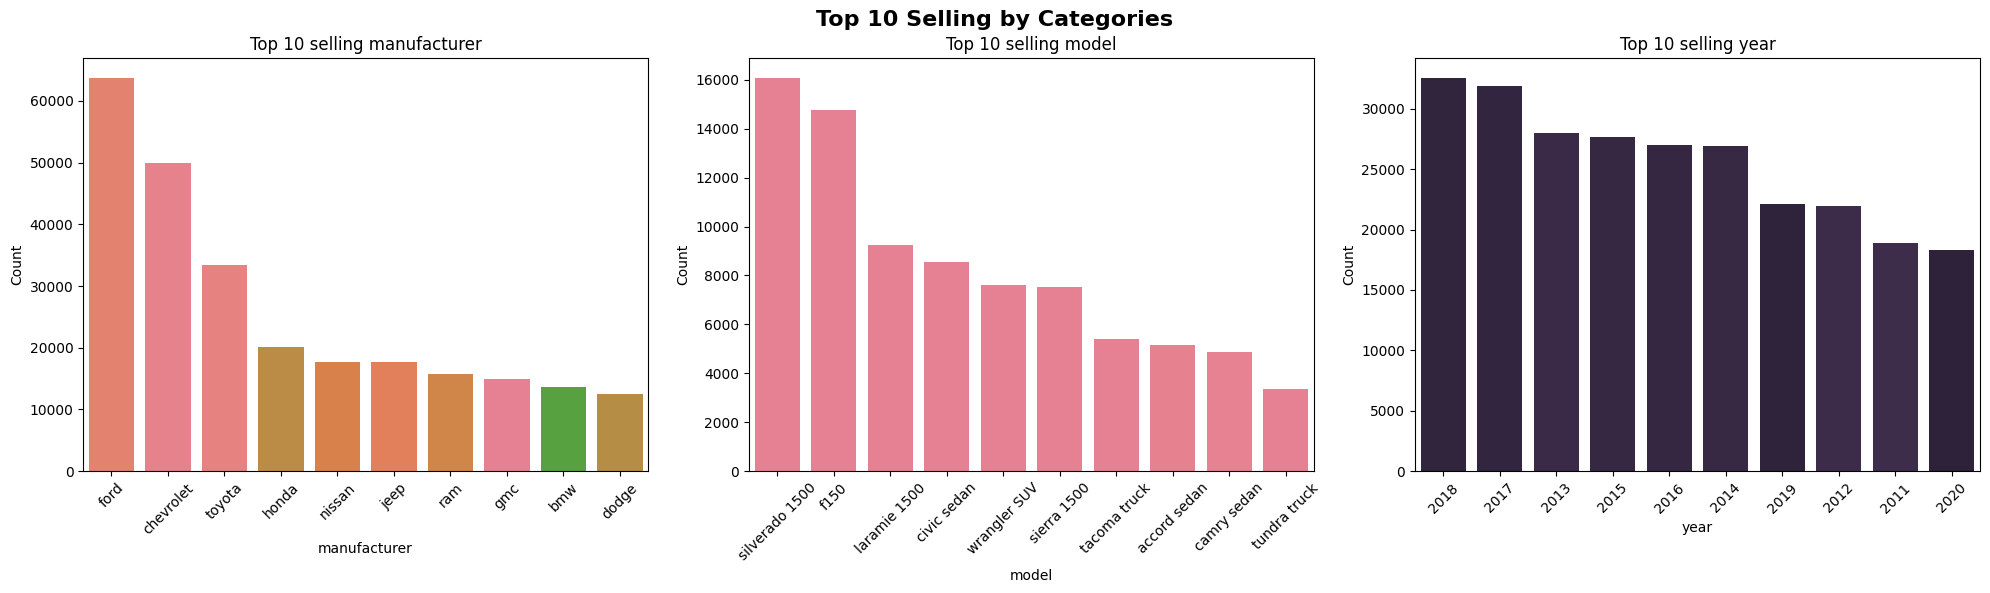

In [162]:
columns = ['manufacturer','model','year']

# Calculate subplot grid
n_cols = 3  # Number of columns in subplot grid
n_rows = int(np.ceil(len(columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
fig.suptitle('Top 10 Selling by Categories', fontsize=16, fontweight='bold')

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(columns):
    top_selling = data[col].value_counts().head(10)

    # Plot on specific subplot
    sns.countplot(x=col, data=data, order=top_selling.index, hue=col, ax=axes[i], legend=False)
    axes[i].set_title(f'Top 10 selling {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots if any
for j in range(len(columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.90)  # More space between suptitle and subplots
plt.show()

**Visualize total sale sale by categorical columns**

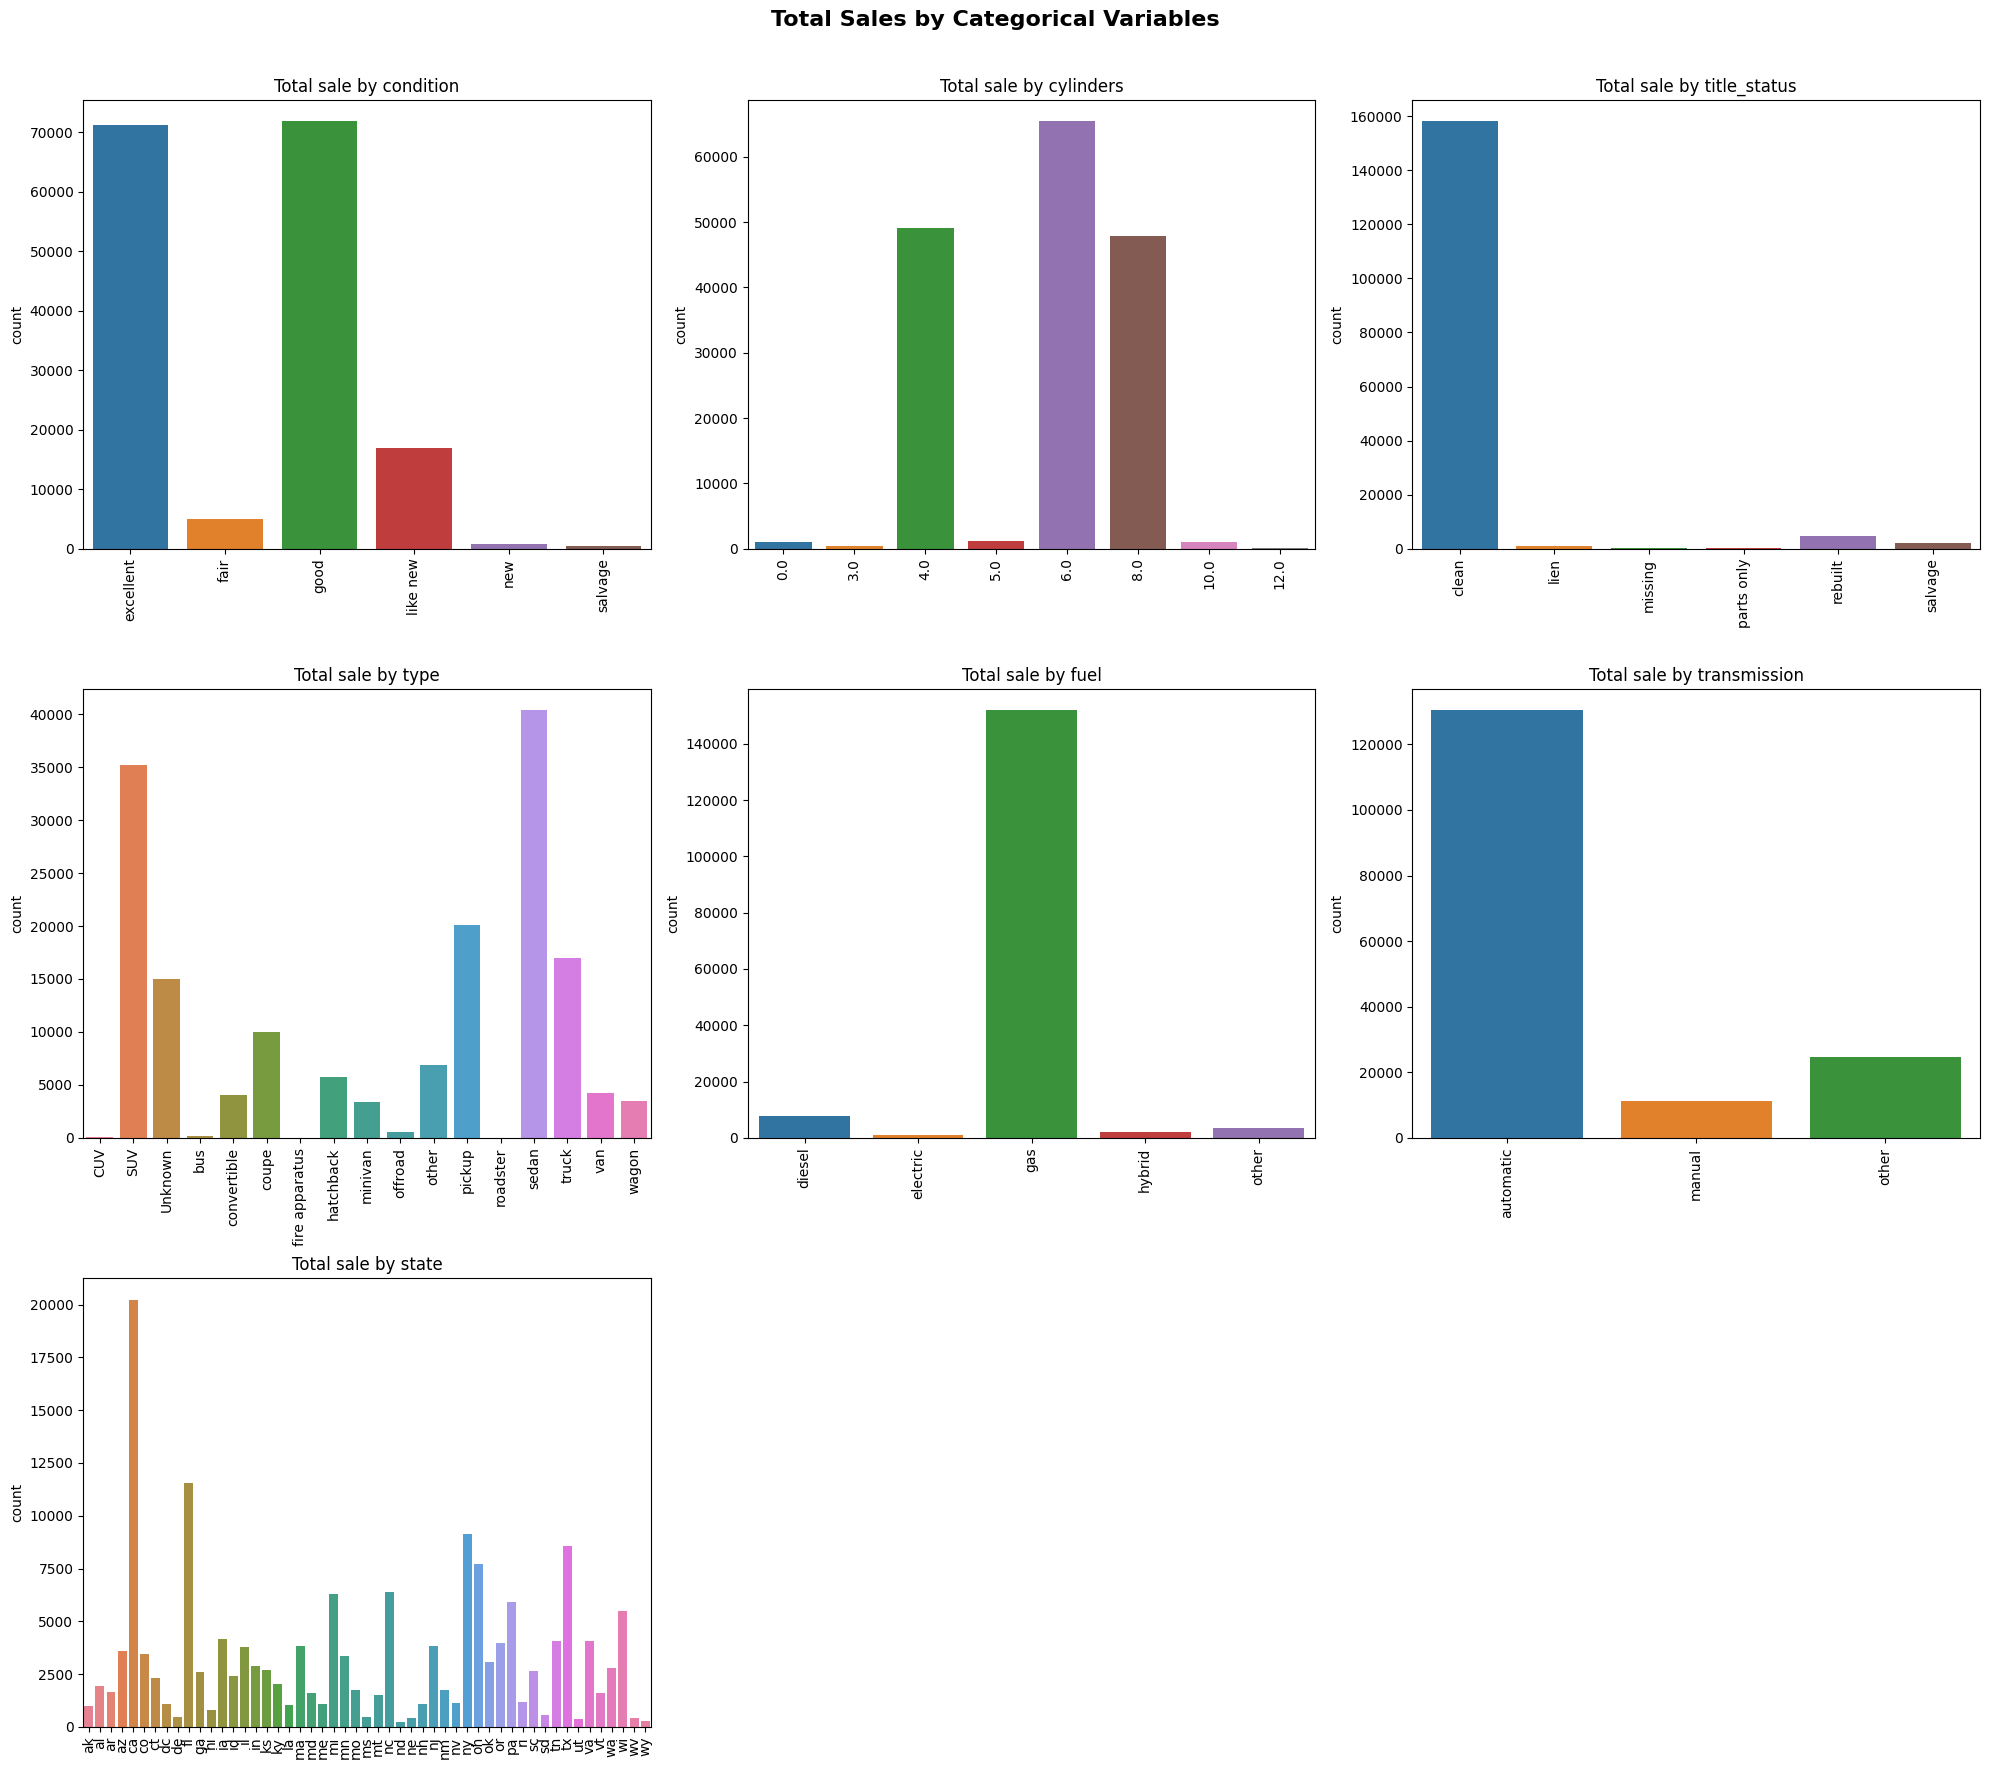

In [163]:
categorical_columns = ['condition','cylinders','title_status','type','fuel','transmission','state']
clean_data = data.dropna(subset=categorical_columns).copy()

# Calculate subplot grid
n_cols = 3  # Number of columns in subplot grid
n_rows = int(np.ceil(len(categorical_columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
fig.suptitle('Total Sales by Categorical Variables', fontsize=16, fontweight='bold')

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    clean_data[col] = clean_data[col].astype('category')

    # Plot on specific subplot
    sns.countplot(x=col, data=clean_data, hue=col, ax=axes[i], legend=False)
    axes[i].set_title(f'Total sale by {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel('')

# Hide empty subplots if any
for j in range(len(categorical_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Add space between suptitle and subplots
plt.show()

**Visualize avaerage price of car sold by categorical columns**

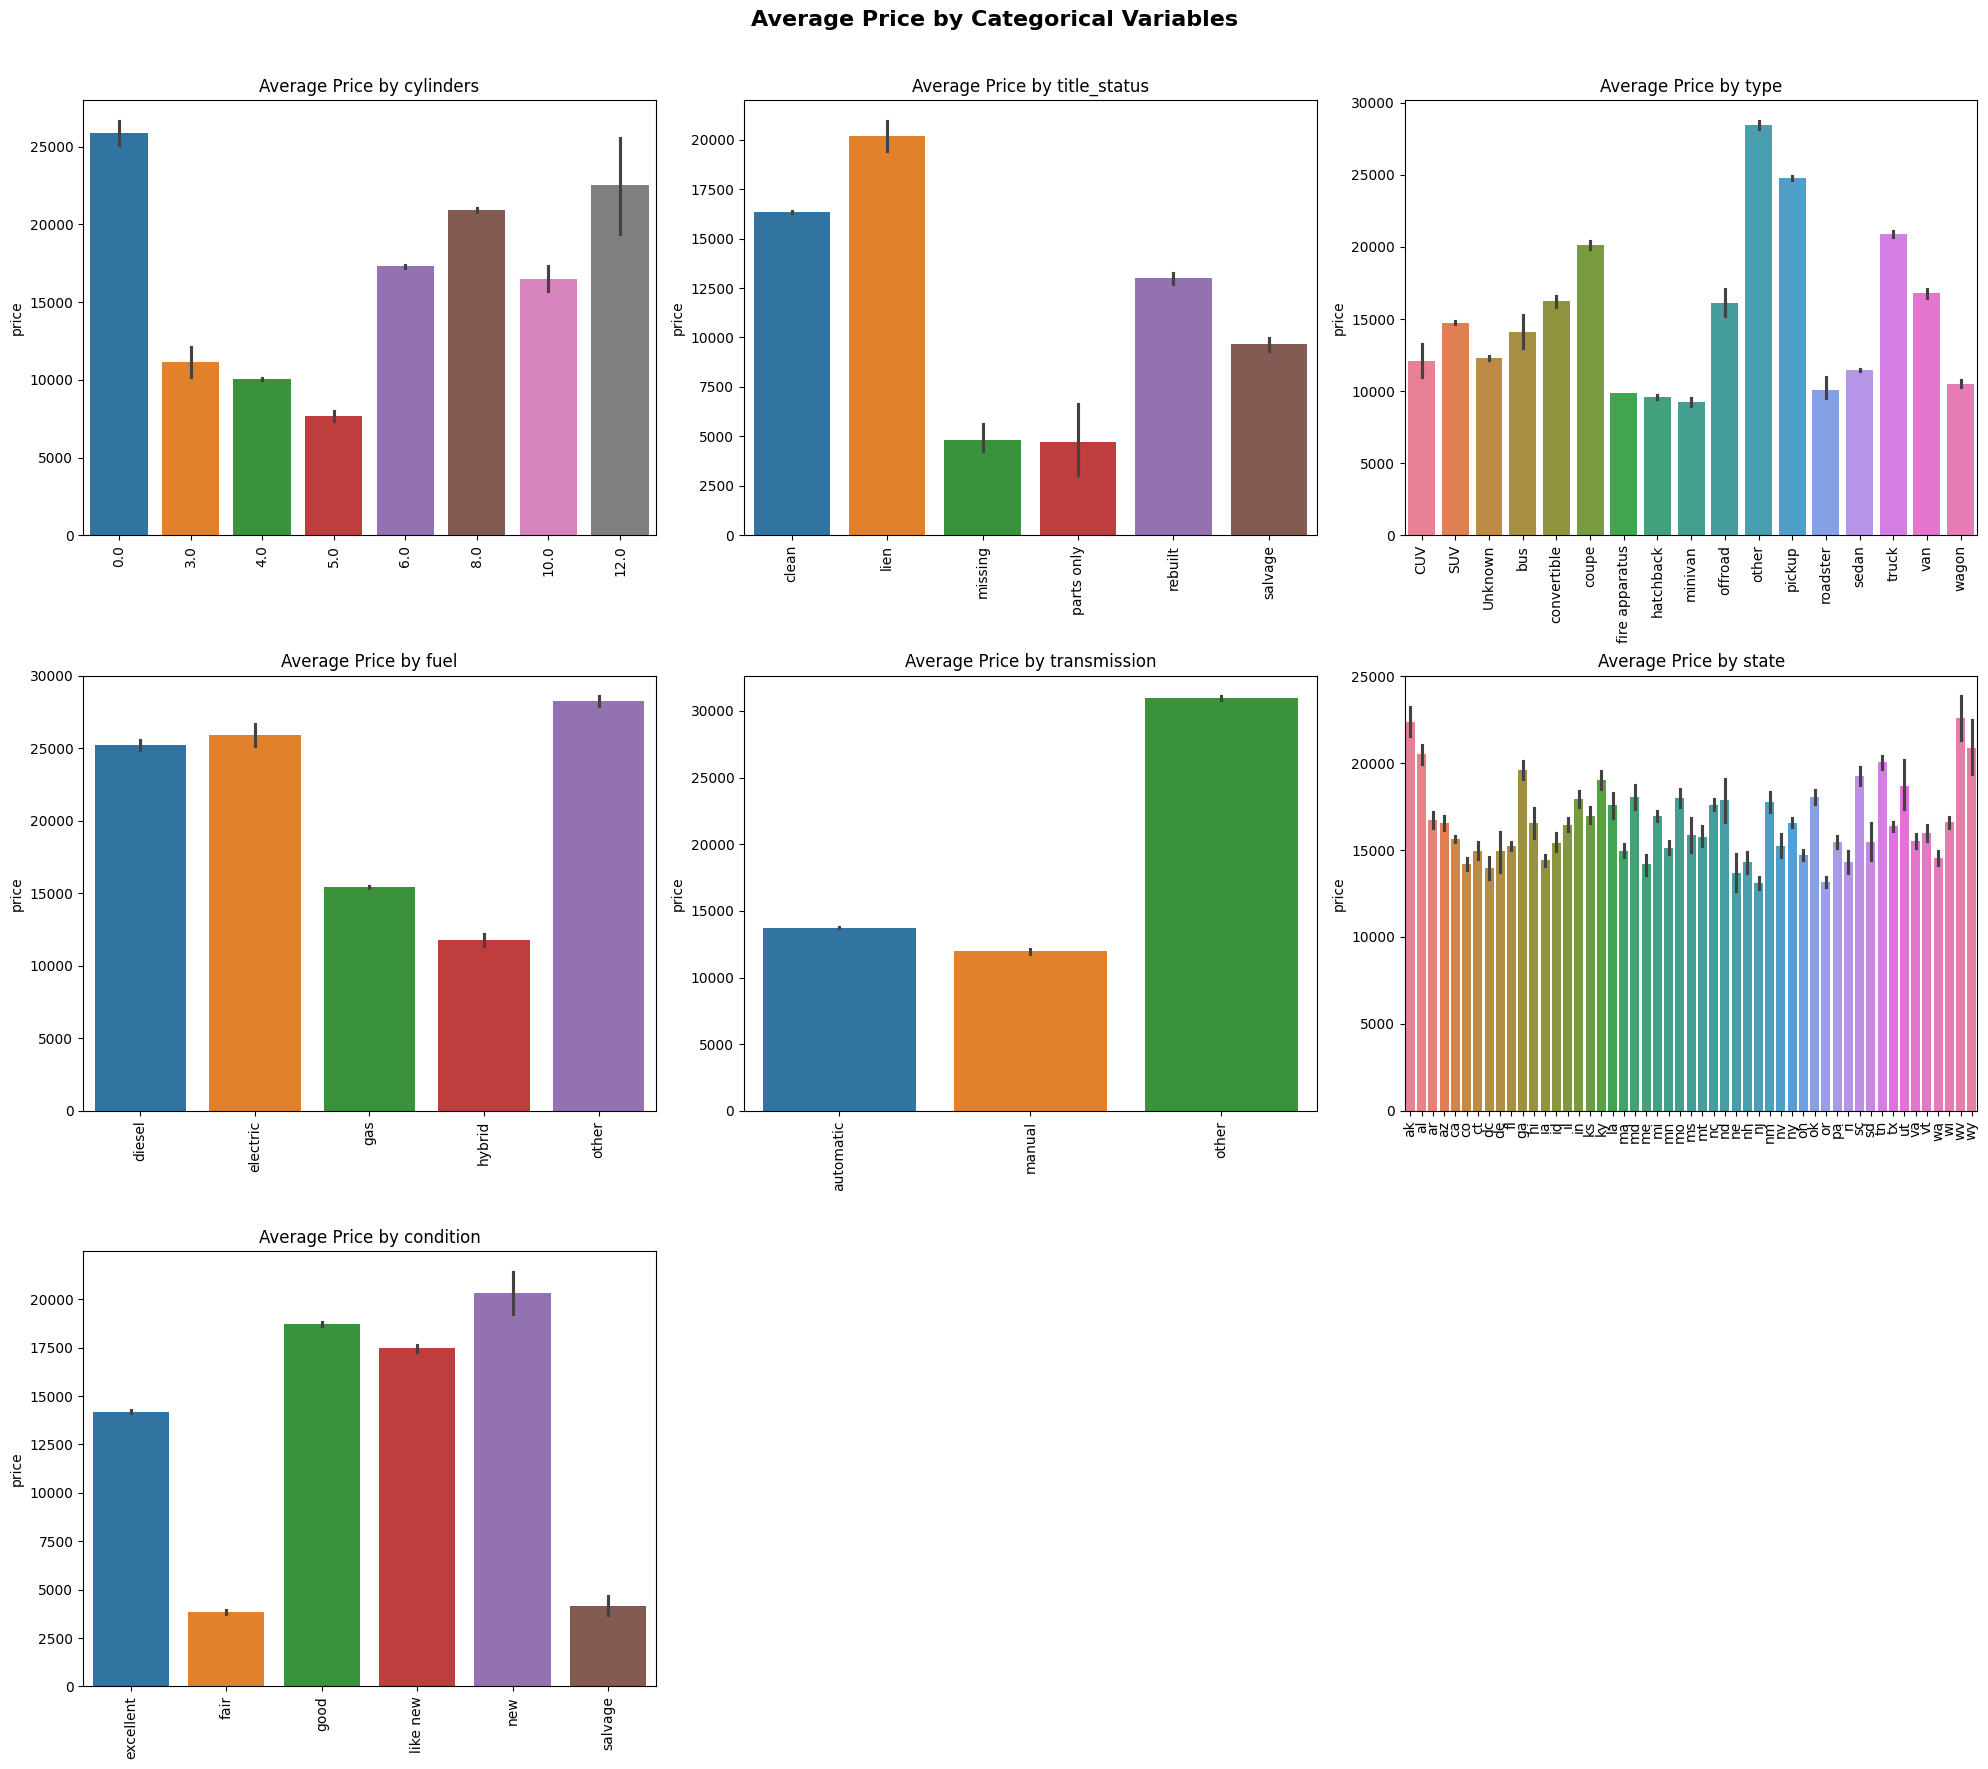

In [164]:
categorical_columns = ['cylinders','title_status','type','fuel','transmission','state','condition']
clean_data = data.dropna(subset=categorical_columns).copy()

# Calculate subplot grid
n_cols = 3  # Number of columns in subplot grid
n_rows = int(np.ceil(len(categorical_columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
fig.suptitle('Average Price by Categorical Variables', fontsize=16, fontweight='bold')

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    clean_data[col] = clean_data[col].astype('category')

    # Plot on specific subplot
    sns.barplot(x=col, y='price', hue=col, data=clean_data, estimator='mean', legend=False, ax=axes[i])
    axes[i].set_title(f'Average Price by {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel('')

# Hide empty subplots if any
for j in range(len(categorical_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Add space between suptitle and subplots
plt.show()

**Visualize correlation matrix to see correlations between features**

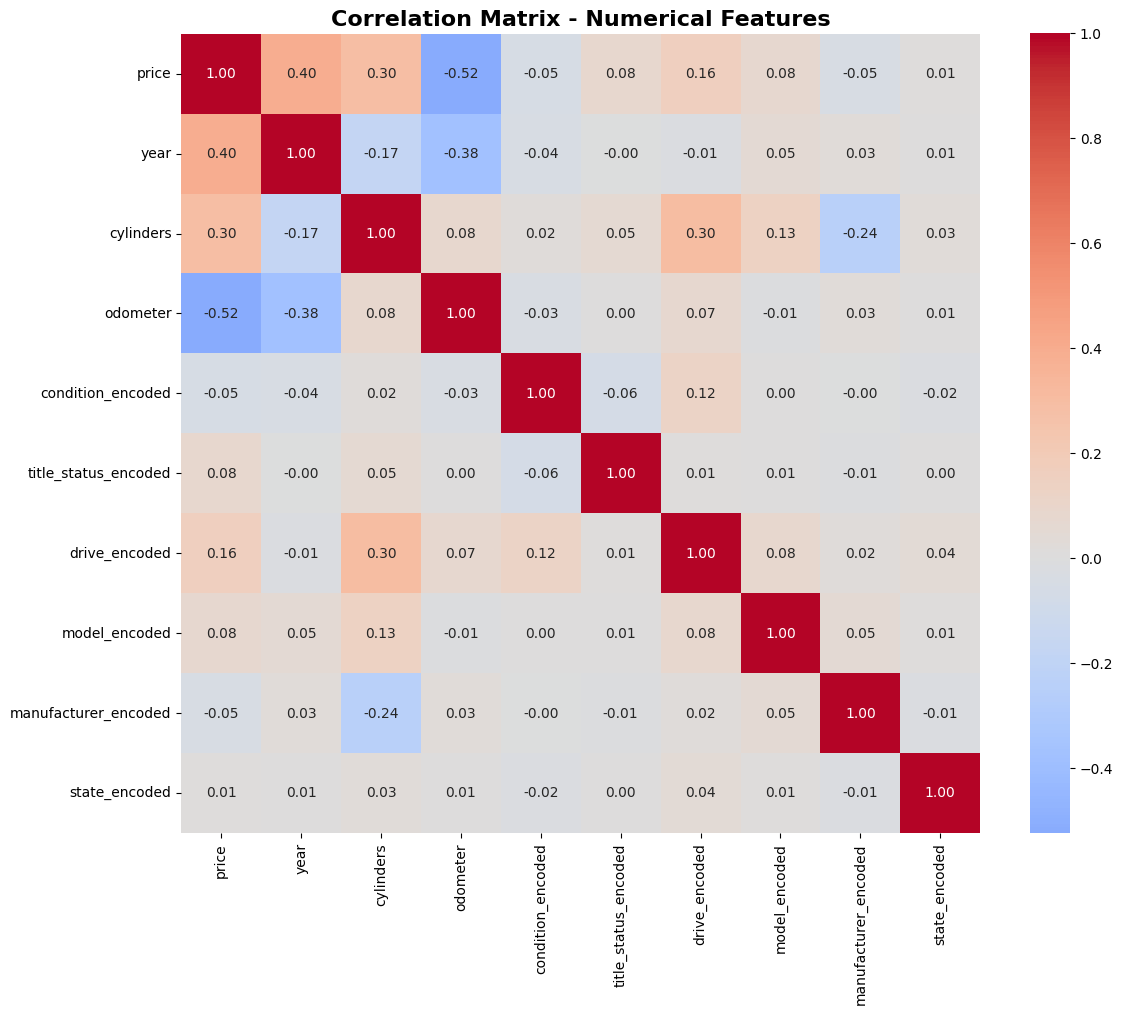

<Figure size 640x480 with 0 Axes>

In [165]:
def plot_correlation_heatmap(df, figsize=(12, 10)):
    """
    Create correlation heatmap for numerical features
    """
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()

    # Create heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='coolwarm',
                center=0,
                square=True,
                fmt='.2f')

    plt.title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    plt.savefig(f'images/correlation_matrix.png')

    return correlation_matrix

# Usage
corr_matrix = plot_correlation_heatmap(data)

**Create training and testing data for RandomForestRegressor and XGBRegressor to find most important factors determining car prices**

In [166]:
X = data[['model_encoded','manufacturer_encoded','year','odometer','condition_encoded','title_status_encoded','drive_encoded','state_encoded','cylinders']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
rf = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf.fit(X_train, y_train)
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'rf_importance': rf.feature_importances_
})

In [168]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_importance = pd.DataFrame({
    'feature': X.columns,
    'xgb_importance': xgb_model.feature_importances_
})

**Feature importance based of RandomForestRegressor and XGBRegressor**

In [169]:
final_importance = rf_importance.merge(xgb_importance, on='feature')
final_importance['avg_importance'] = (final_importance['rf_importance'] +
                                     final_importance['xgb_importance']) / 2
final_importance = final_importance.sort_values('avg_importance', ascending=False)

print("TOP 10 MOST IMPORTANT FEATURES:")
print(final_importance.head(10))

TOP 10 MOST IMPORTANT FEATURES:
                feature  rf_importance  xgb_importance  avg_importance
2                  year       0.450857        0.347732        0.399294
8             cylinders       0.114219        0.175253        0.144736
6         drive_encoded       0.087213        0.166339        0.126776
3              odometer       0.128185        0.080524        0.104355
0         model_encoded       0.108218        0.053513        0.080865
1  manufacturer_encoded       0.053970        0.057461        0.055715
4     condition_encoded       0.026442        0.043671        0.035056
5  title_status_encoded       0.010257        0.053445        0.031851
7         state_encoded       0.020638        0.022063        0.021351


**Create training data for linear, ridge, lasso and elastic net regressors**

In [170]:
X = data[['model_encoded','manufacturer_encoded','year','odometer','condition_encoded','title_status_encoded','drive_encoded','state_encoded']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for regularized models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [171]:
def train_linear_models():
    """Train all linear models with optimal hyperparameters"""

    models = {}

    # 1. Linear Regression (no hyperparameters)
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    models['Linear Regression'] = lr

    # 2. Ridge Regression with hyperparameter tuning
    ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}
    ridge_grid = GridSearchCV(Ridge(random_state=42), ridge_params,
                             cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    ridge_grid.fit(X_train_scaled, y_train)
    models['Ridge'] = ridge_grid.best_estimator_
    print(f"Best Ridge alpha: {ridge_grid.best_params_['alpha']}")

    # 3. Lasso Regression with hyperparameter tuning
    lasso_params = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}
    lasso_grid = GridSearchCV(Lasso(random_state=42, max_iter=2000), lasso_params,
                             cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    lasso_grid.fit(X_train_scaled, y_train)
    models['Lasso'] = lasso_grid.best_estimator_
    print(f"Best Lasso alpha: {lasso_grid.best_params_['alpha']}")

    # 4. ElasticNet with hyperparameter tuning
    elastic_params = {
        'alpha': [0.1, 1.0, 10.0, 100.0],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    }
    elastic_grid = GridSearchCV(ElasticNet(random_state=42, max_iter=2000), elastic_params,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    elastic_grid.fit(X_train_scaled, y_train)
    models['ElasticNet'] = elastic_grid.best_estimator_
    print(f"Best ElasticNet params: {elastic_grid.best_params_}")

    return models

# Train all models
trained_models = train_linear_models()

Best Ridge alpha: 10.0
Best Lasso alpha: 0.1
Best ElasticNet params: {'alpha': 0.1, 'l1_ratio': 0.9}


**Model performances**

In [172]:
def comprehensive_model_evaluation(models, X_train, X_test, y_train, y_test):
    """Evaluate models using multiple metrics"""

    results = []
    predictions = {}

    for name, model in models.items():
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        predictions[name] = y_test_pred

        # Calculate metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        # Calculate MAPE (Mean Absolute Percentage Error)
        train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
        test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

        # Overfitting check
        overfitting = train_r2 - test_r2

        results.append({
            'Model': name,
            'Train_RMSE': train_rmse,
            'Test_RMSE': test_rmse,
            'Train_MAE': train_mae,
            'Test_MAE': test_mae,
            'Train_R²': train_r2,
            'Test_R²': test_r2,
            'Train_MAPE': train_mape,
            'Test_MAPE': test_mape,
            'Overfitting': overfitting
        })

    results_df = pd.DataFrame(results)
    return results_df, predictions

# Evaluate all models
evaluation_results, model_predictions = comprehensive_model_evaluation(
    trained_models, X_train_scaled, X_test_scaled, y_train, y_test
)

print("MODEL COMPARISON RESULTS")
print("="*50)
print(evaluation_results.round(3))

MODEL COMPARISON RESULTS
               Model  Train_RMSE  Test_RMSE  Train_MAE  Test_MAE  Train_R²  \
0  Linear Regression    9939.939   9901.793   7563.127  7534.026     0.377   
1              Ridge    9939.939   9901.792   7563.142  7534.040     0.377   
2              Lasso    9939.939   9901.791   7563.140  7534.038     0.377   
3         ElasticNet    9940.166   9901.852   7567.963  7538.596     0.377   

   Test_R²  Train_MAPE  Test_MAPE  Overfitting  
0    0.376    8790.159   8498.808        0.001  
1    0.376    8790.131   8498.780        0.001  
2    0.376    8790.174   8498.819        0.001  
3    0.376    8781.692   8490.568        0.001  


In [173]:
def cross_validation_comparison(models, X, y, cv=5):
    """Compare models using cross-validation"""

    cv_results = {}

    for name, model in models.items():
        # Perform cross-validation
        cv_scores = cross_val_score(model, X, y, cv=cv,
                                   scoring='neg_mean_squared_error', n_jobs=-1)
        cv_rmse = np.sqrt(-cv_scores)

        cv_r2_scores = cross_val_score(model, X, y, cv=cv,
                                      scoring='r2', n_jobs=-1)

        cv_results[name] = {
            'RMSE_mean': cv_rmse.mean(),
            'RMSE_std': cv_rmse.std(),
            'R²_mean': cv_r2_scores.mean(),
            'R²_std': cv_r2_scores.std()
        }

    cv_df = pd.DataFrame(cv_results).T
    return cv_df

# Cross-validation comparison
cv_comparison = cross_validation_comparison(trained_models, X_train_scaled, y_train)
print("\nCROSS-VALIDATION COMPARISON")
print("="*35)
print(cv_comparison.round(4))


CROSS-VALIDATION COMPARISON
                   RMSE_mean  RMSE_std  R²_mean  R²_std
Linear Regression  9940.3952   43.3294   0.3773   0.003
Ridge              9940.3952   43.3309   0.3773   0.003
Lasso              9940.3952   43.3305   0.3773   0.003
ElasticNet         9940.6128   43.6894   0.3773   0.003


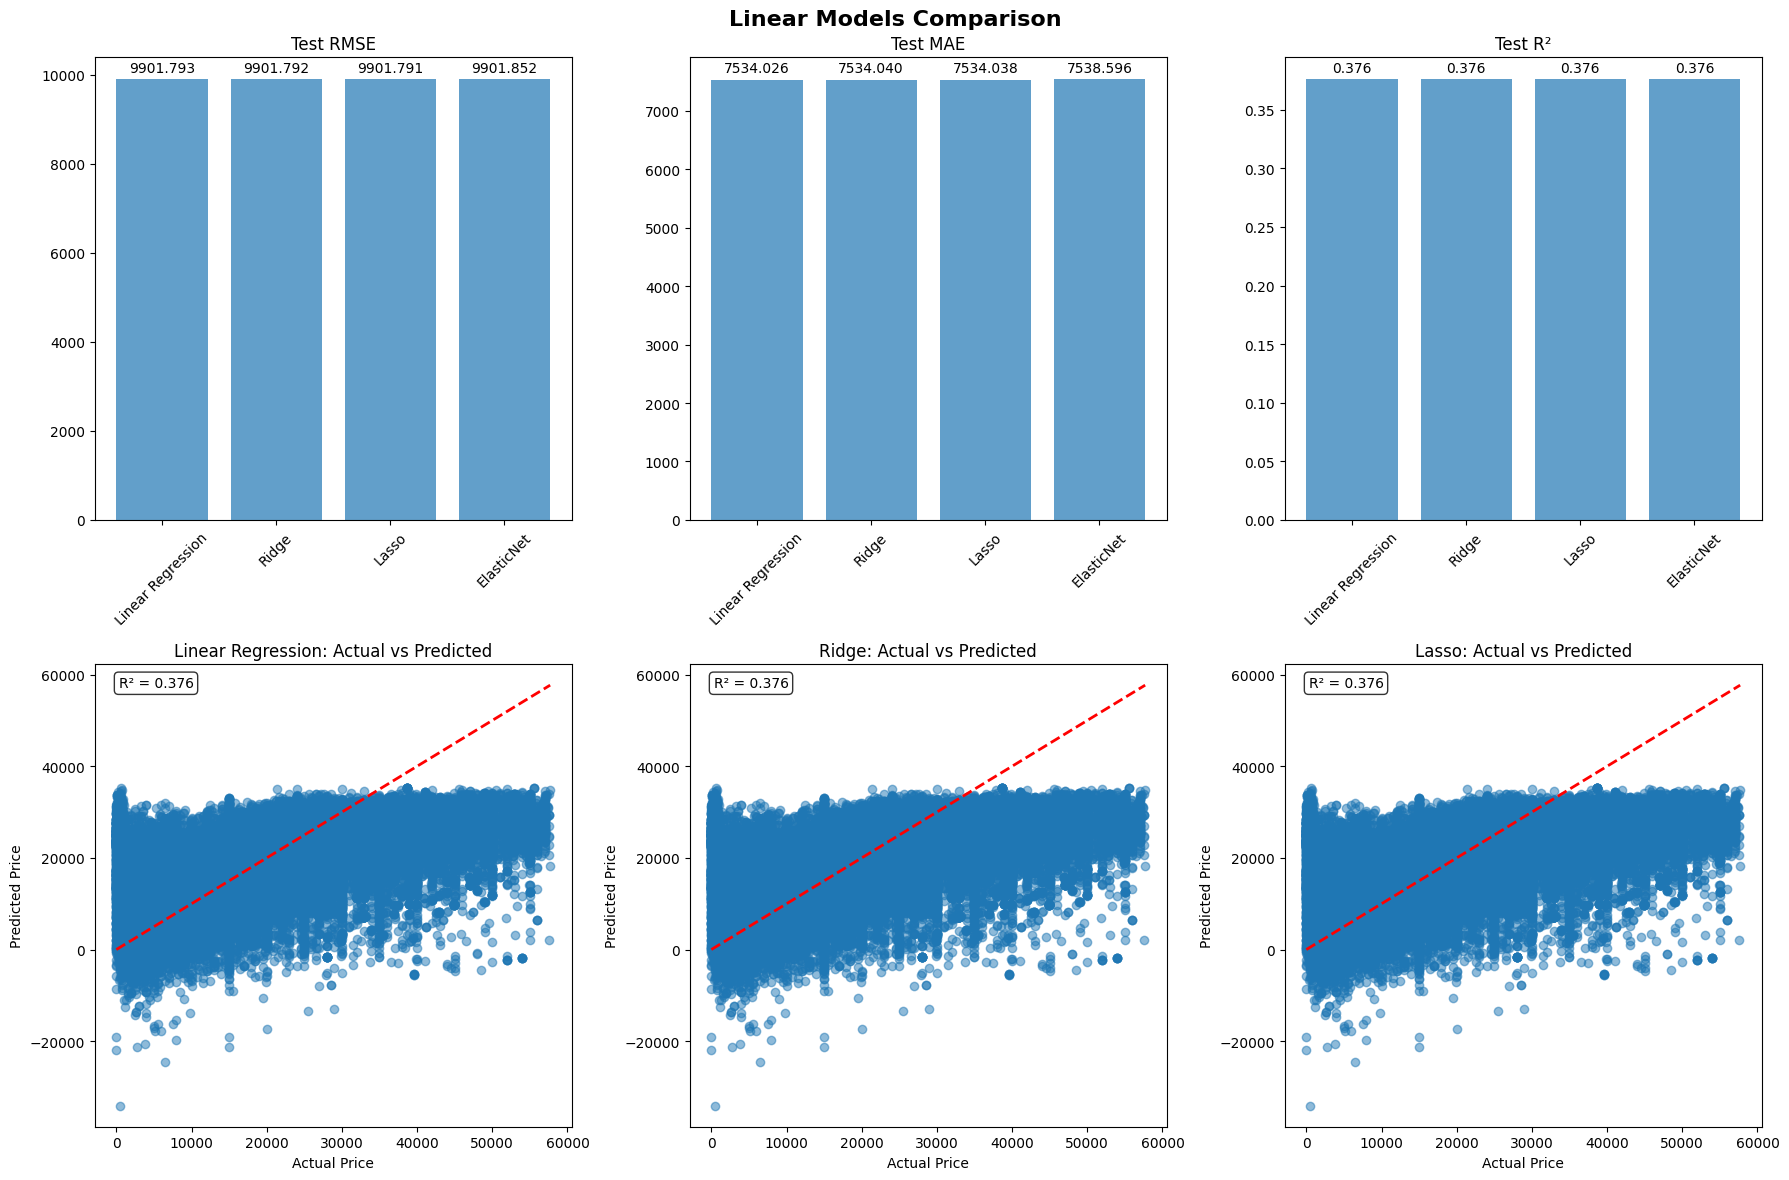

In [174]:
def visualize_model_comparison(results_df, predictions_dict, y_test):
    """Create comprehensive visualization of model comparison"""

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Linear Models Comparison', fontsize=16, fontweight='bold')

    # 1. Performance Metrics Comparison
    metrics = ['Test_RMSE', 'Test_MAE', 'Test_R²']
    x_pos = np.arange(len(results_df))

    for i, metric in enumerate(metrics):
        ax = axes[0, i]
        bars = ax.bar(x_pos, results_df[metric], alpha=0.7)
        ax.set_title(f'{metric.replace("_", " ")}')
        ax.set_xticks(x_pos)
        ax.set_xticklabels(results_df['Model'], rotation=45)

        # Add value labels on bars
        for bar, value in zip(bars, results_df[metric]):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{value:.3f}', ha='center', va='bottom')

    # 2. Actual vs Predicted plots
    for i, (name, pred) in enumerate(predictions_dict.items()):
        if i < 3:  # Show first 3 models
            ax = axes[1, i]
            ax.scatter(y_test, pred, alpha=0.5)
            ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
            ax.set_xlabel('Actual Price')
            ax.set_ylabel('Predicted Price')
            ax.set_title(f'{name}: Actual vs Predicted')

            # Calculate and display R²
            r2 = r2_score(y_test, pred)
            ax.text(0.05, 0.95, f'R² = {r2:.3f}', transform=ax.transAxes,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

# Create visualizations
visualize_model_comparison(evaluation_results, model_predictions, y_test)

**Feature importance per linear, ridge, lasso, elasticnet regression**

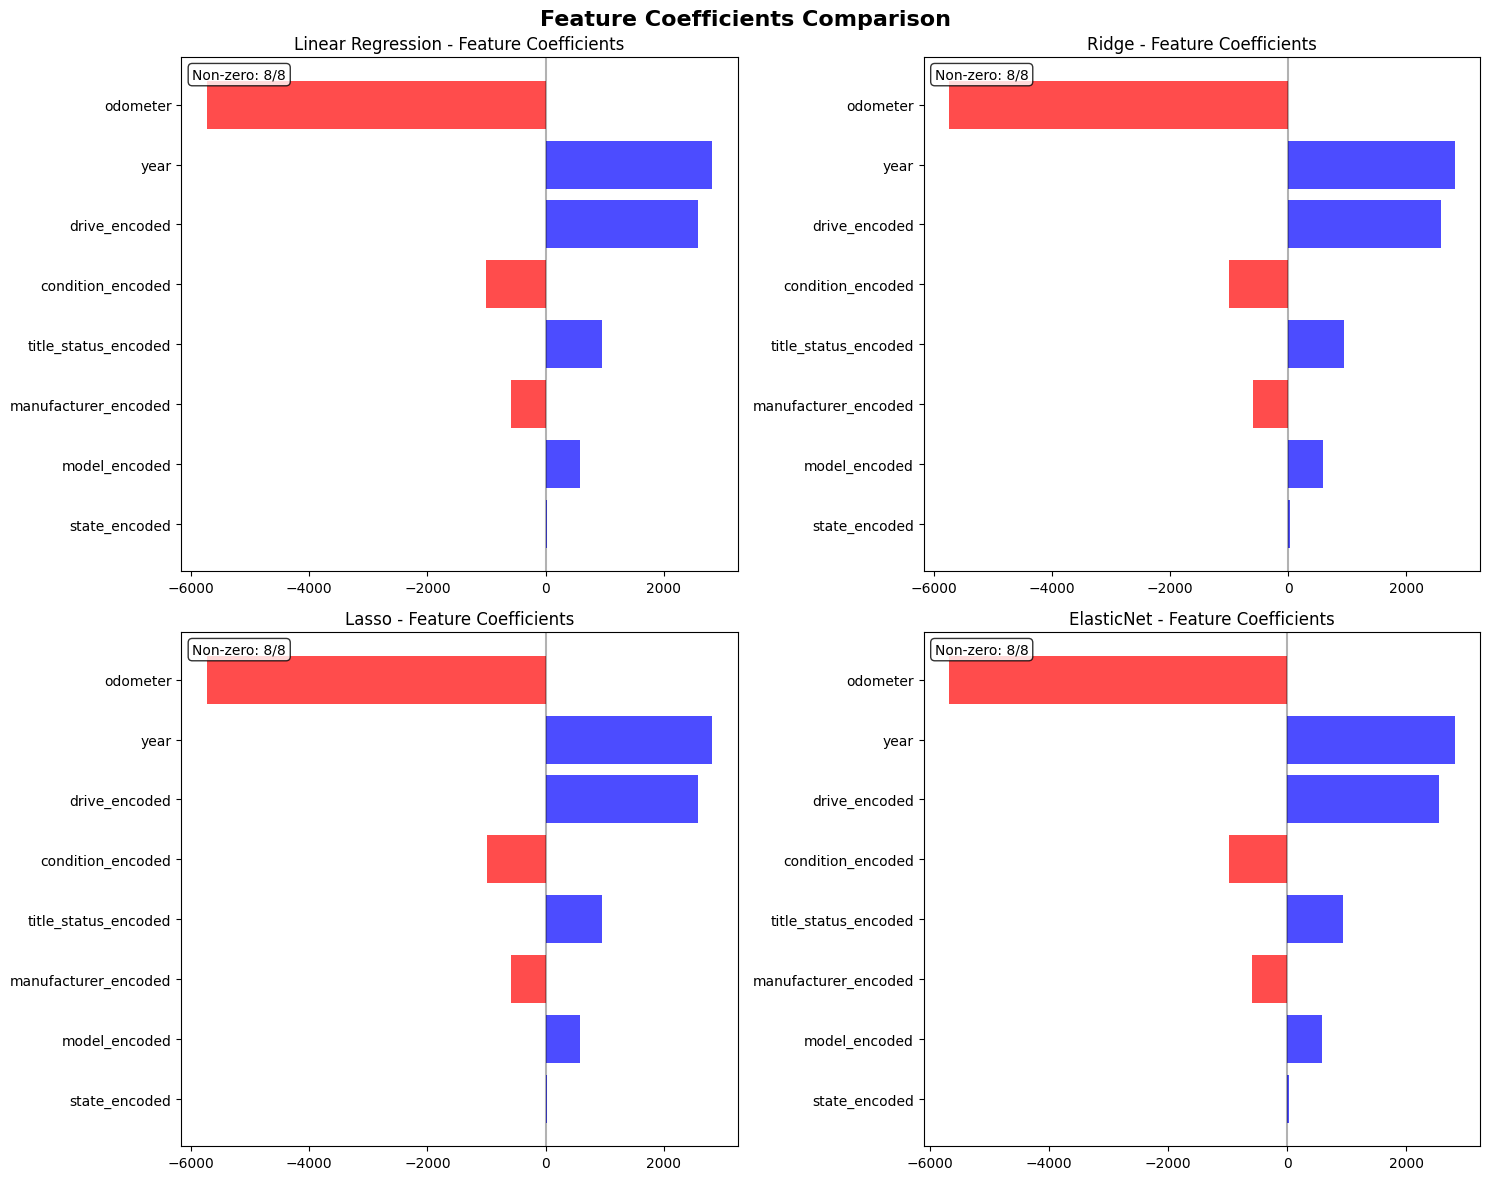


FEATURE SELECTION RESULTS
Linear Regression: 8/8 features selected
Ridge: 8/8 features selected
Lasso: 8/8 features selected
ElasticNet: 8/8 features selected


In [175]:
def analyze_feature_importance(models, feature_names):
    """Analyze feature importance/coefficients for linear models"""

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Feature Coefficients Comparison', fontsize=16, fontweight='bold')

    axes = axes.ravel()

    for i, (name, model) in enumerate(models.items()):
        if hasattr(model, 'coef_'):
            coefficients = model.coef_

            # Create DataFrame for easier handling
            coef_df = pd.DataFrame({
                'Feature': feature_names,
                'Coefficient': coefficients
            })
            coef_df['Abs_Coefficient'] = np.abs(coefficients)
            coef_df = coef_df.sort_values('Abs_Coefficient', ascending=True)

            # Plot
            ax = axes[i]
            colors = ['red' if x < 0 else 'blue' for x in coef_df['Coefficient']]
            ax.barh(range(len(coef_df)), coef_df['Coefficient'], color=colors, alpha=0.7)
            ax.set_yticks(range(len(coef_df)))
            ax.set_yticklabels(coef_df['Feature'])
            ax.set_title(f'{name} - Feature Coefficients')
            ax.axvline(x=0, color='black', linestyle='-', alpha=0.3)

            # Count non-zero coefficients (for Lasso/ElasticNet)
            non_zero = np.sum(np.abs(coefficients) > 1e-6)
            ax.text(0.02, 0.98, f'Non-zero: {non_zero}/{len(coefficients)}',
                   transform=ax.transAxes, va='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    # Print feature selection results
    print("\nFEATURE SELECTION RESULTS")
    print("="*30)
    for name, model in models.items():
        if hasattr(model, 'coef_'):
            non_zero_features = np.sum(np.abs(model.coef_) > 1e-6)
            print(f"{name}: {non_zero_features}/{len(feature_names)} features selected")

# Analyze feature importance
feature_names = X.columns.tolist()
analyze_feature_importance(trained_models, feature_names)

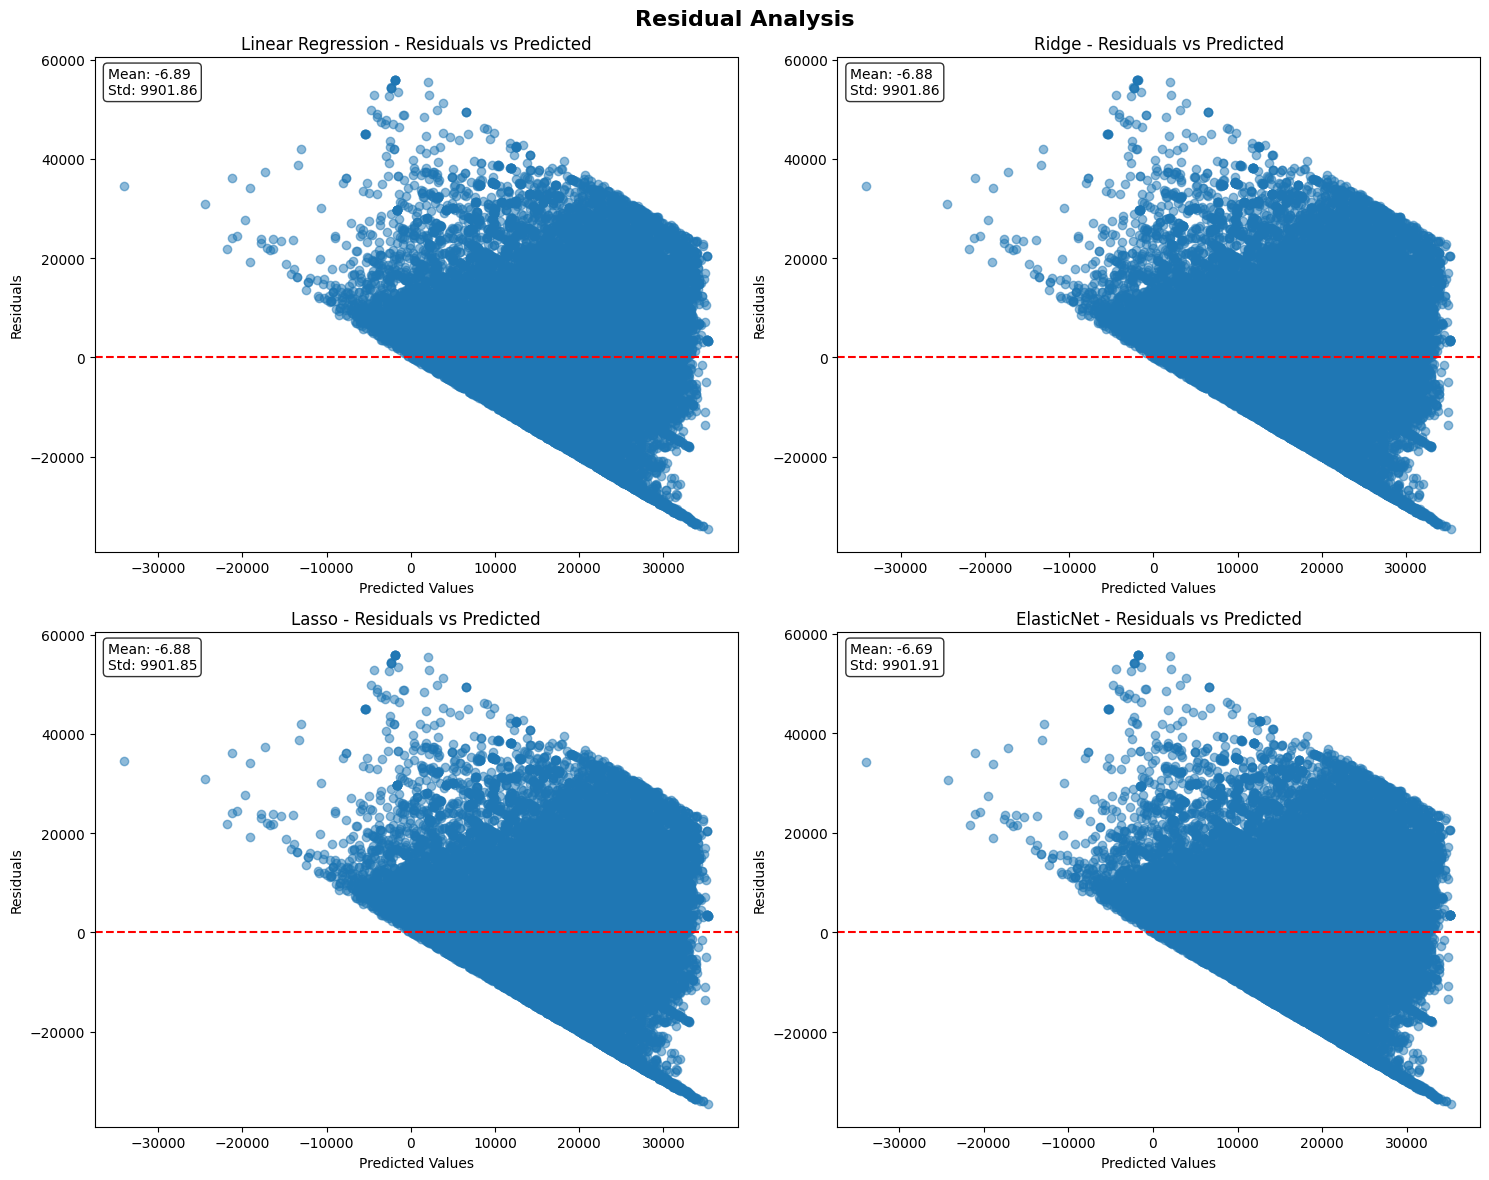

In [176]:
def residual_analysis(predictions_dict, y_test):
    """Analyze residuals for each model"""

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Residual Analysis', fontsize=16, fontweight='bold')

    axes = axes.ravel()

    for i, (name, pred) in enumerate(predictions_dict.items()):
        residuals = y_test - pred

        ax = axes[i]

        # Residuals vs Predicted
        ax.scatter(pred, residuals, alpha=0.5)
        ax.axhline(y=0, color='red', linestyle='--')
        ax.set_xlabel('Predicted Values')
        ax.set_ylabel('Residuals')
        ax.set_title(f'{name} - Residuals vs Predicted')

        # Add statistics
        mean_residual = residuals.mean()
        std_residual = residuals.std()
        ax.text(0.02, 0.98, f'Mean: {mean_residual:.2f}\nStd: {std_residual:.2f}',
               transform=ax.transAxes, va='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

# Perform residual analysis
residual_analysis(model_predictions, y_test)

In [177]:
def model_recommendation(results_df):
    """Provide model recommendation based on results"""

    print("\nMODEL RECOMMENDATION")
    print("="*25)

    # Rank models by different criteria
    best_r2 = results_df.loc[results_df['Test_R²'].idxmax(), 'Model']
    best_rmse = results_df.loc[results_df['Test_RMSE'].idxmin(), 'Model']
    least_overfit = results_df.loc[results_df['Overfitting'].idxmin(), 'Model']

    print(f"Best R² Score: {best_r2}")
    print(f"Lowest RMSE: {best_rmse}")
    print(f"Least Overfitting: {least_overfit}")

    # Overall recommendation
    print(f"\nDETAILED ANALYSIS:")
    print("-" * 20)

    for _, row in results_df.iterrows():
        model_name = row['Model']
        print(f"\n{model_name}:")
        print(f"  • R² Score: {row['Test_R²']:.3f}")
        print(f"  • RMSE: ${row['Test_RMSE']:,.0f}")
        print(f"  • Overfitting: {row['Overfitting']:.3f}")

        # Model-specific insights
        if model_name == 'Linear Regression':
            print(f"  • No regularization - may overfit")
        elif model_name == 'Ridge':
            print(f"  • L2 regularization - good for multicollinearity")
        elif model_name == 'Lasso':
            print(f"  • L1 regularization - performs feature selection")
        elif model_name == 'ElasticNet':
            print(f"  • L1+L2 regularization - balanced approach")

    # Final recommendation
    print(f"\nRECOMMENDATION:")
    print("="*15)
    if results_df['Test_R²'].max() - results_df['Test_R²'].min() < 0.01:
        print("Performance differences are minimal. Choose based on interpretability:")
        print("• Linear Regression: Most interpretable")
        print("• Lasso: If you want automatic feature selection")
        print("• Ridge: If you suspect multicollinearity")
    else:
        best_overall = results_df.loc[results_df['Test_R²'].idxmax(), 'Model']
        print(f"Choose {best_overall} for best performance")

# Get recommendation
model_recommendation(evaluation_results)


MODEL RECOMMENDATION
Best R² Score: Lasso
Lowest RMSE: Lasso
Least Overfitting: ElasticNet

DETAILED ANALYSIS:
--------------------

Linear Regression:
  • R² Score: 0.376
  • RMSE: $9,902
  • Overfitting: 0.001
  • No regularization - may overfit

Ridge:
  • R² Score: 0.376
  • RMSE: $9,902
  • Overfitting: 0.001
  • L2 regularization - good for multicollinearity

Lasso:
  • R² Score: 0.376
  • RMSE: $9,902
  • Overfitting: 0.001
  • L1 regularization - performs feature selection

ElasticNet:
  • R² Score: 0.376
  • RMSE: $9,902
  • Overfitting: 0.001
  • L1+L2 regularization - balanced approach

RECOMMENDATION:
Performance differences are minimal. Choose based on interpretability:
• Linear Regression: Most interpretable
• Lasso: If you want automatic feature selection
• Ridge: If you suspect multicollinearity
